# NHST I: The Null Hypothesis
In the previous section, we discussed the concept of parameter estimates as random variables and then explored the meaning of their sampling distributions. In particular, we examined the *expected value* as a measurement of *bias*, and the *standard error* as a measurement of *uncertainty*. We also saw how we could use both these pieces of information to reach rough descriptive conclusions about how much we can trust our estimates. However, one problem with this approach is that it can appear quite subjective and imprecise. In the next three part of the lesson, we will discuss *null hypothesis significance testing* (NHST). This is the most common method used in psychology for reaching more formal conclusions based on this information.

## Estimates and Population Values
Remembering that our interest lies in *population* values rather than estimates, a fundamental idea in NHST is to compare our estimate values to some *hypothesised* population values. The aim is to assess how compatible the results of our model are with those hypothesised values. If our results appear compatible, this provides evidence in favour of the hypothesised values, whereas incompatible results provide evidence against the hypothesised values.

### Comparing an Estimate with a Hypothesised Value
To make the idea of comparing an estimate to a hypothesised value clearer, we will focus on a single slope estimate $\hat{\beta}_{1}$. We will then denote our hypothesised population value as $\beta_{1}^{(0)}$. This should makes it clear that we still do not know what value $\beta_{1}$ has, but we are simply taking a guess. We can then calculate

$$
\delta = \hat{\beta}_{1} - \beta_{1}^{(0)}.
$$

The magnitude of $\delta$ tells us how far away our estimate is from our hypothesised population value. Putting aside the issue of deciding what value to choose $\beta_{1}^{(0)}$, we would ideally interpret a *large* $\delta$ as indicating that our hypothesised value *might be wrong*, and a small $\delta$ as indicating that our hypothesised value *might be correct*. 

In order to define what a *large* or *small* value of $\delta$ means, we can appeal to probability. If we assume that $\beta_{1}^{(0)} = \beta_{1}$ (i.e. that our hypothesised value is *correct*), we would like to assess whether $\delta$ has a *high probability* or a *low probability*. So, in effect, we want to calculate

$$
P(\delta|\text{Our hypothesis is correct}) = P\left(\delta\middle|\beta_{1}^{(0)} = \beta_{1}\right).
$$

A $\delta$ with a *low* probability suggests we have calculate a difference that is *unlikely*, if our hypothesised value were true. In other words, $\delta$ is *incompatible* with the idea that $\beta_{1}^{(0)} = \beta_{1}$. Similarly, a $\delta$ with a *high* probability suggests we have calculated a difference that is *very likely*, if our hypothesised value were true. This would indicate that $\delta$ is *compatible* with the idea that $\beta_{1}^{(0)} = \beta_{1}$. Notice, however, that these are probability statements about $\delta$, *not* about the hypothesis itself. As such, we are not concluding anything about how probable our hypothesised value is. We are only making statements about how compatible our data are, under the assumptions that we are correct. This is an important detail that we will return to later.

### The Sampling Distribution of $\delta$
Using probability as our metric for determining the compatibility of our data with the proposed population value seems quite reasonable. However, applying probability in this way assumes that $\delta$ is a random variable. Luckily, because $\delta$ is calculated from $\hat{\beta}_{1}$, the randomness in $\hat{\beta}_{1}$ is *passed down* to $\delta$. Treating $\beta_{1}^{(0)}$ as a constant over different samples, the value of $\delta$ will still change due to the fact that $\hat{\beta}_{1}$ will change. As such, $\delta$ *is* a random variable with some sampling distribution. If we know the shape of this distribution when our hypothesised value is *correct*, then we can use it to calculate the probabilities discussed above. 

In terms of the expected value of $\delta$, we have[^expectfoot]

$$
E(\delta) = E\left(\hat{\beta}_{1} - \beta_{1}^{(0)}\right) = E\left(\hat{\beta}_{1}\right) - \beta_{1}^{(0)}.
$$

Assuming our estimate is unbiased, we know that $E\left(\hat{\beta}_{1}\right) = \beta_{1}$, meaning that

$$
E(\delta) = \beta_{1} - \beta_{1}^{(0)}.
$$

On average, $\delta$ will therefore be equal to the difference between the true populaton value and our hypothesised value. So, what happens when we are correct? In this situation, $\beta_{1}^{(0)} = \beta_{1}$ and we have

$$
E\left(\delta\middle|\beta_{1}^{(0)} = \beta_{1}\right) = \beta_{1} - \beta_{1}^{(0)} = \beta_{1} - \beta_{1} = 0.
$$

This means that, if our guess is *correct*, the distribution of $\delta$ will be centred on 0. Even without following the equations above, this makes intutive sense. If our guess is right then on average our estimate should equal the true value and the difference between our estimate and our guess will be 0. We can confirm this by running simulations in `R`. Here, we run 5,000 simulations of the situation where we are *correct* about the population value in each sample. The resultant distribution of $\delta$ is shown below.

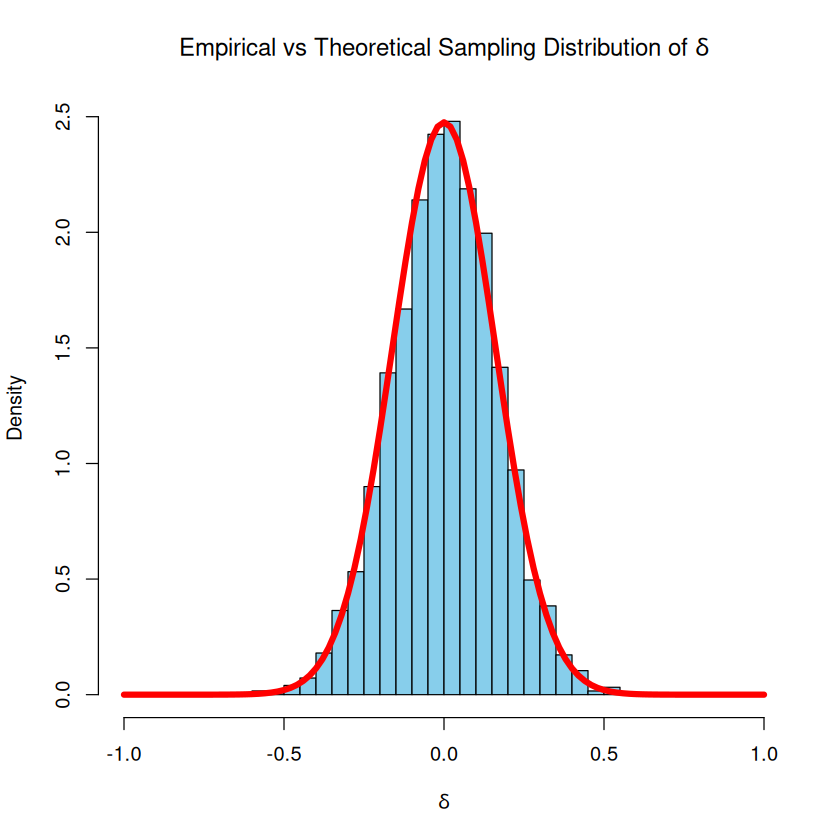

In [1]:
set.seed(666)

# Parameters
beta.0   <- 2
beta.1   <- 3 # True value
beta.1.0 <- 3 # Hypothesised value is correct
sigma    <- 5

# Simulatyions
n        <- 100
n.sims   <- 5000
x        <- runif(n,0,10)
delta    <- rep(0,n.sims)

for (i in 1:n.sims){
    y          <- rnorm(n, mean=beta.0 + beta.1*x, sd=sigma)
    beta.1.hat <- coef(lm(y ~ x))[2]
    delta[i]   <- beta.1.hat - beta.1.0
}

# Compare theoretical and empirical values
theory.var  <- sigma^2 / sum((x - mean(x))^2)
theory.mean <- 0
empiri.var  <- var(delta)
empiri.mean <- mean(delta)

# Plot histogram 
hist(delta, probability=TRUE, col="skyblue", xlim=c(-1,1),
    breaks=25, main=expression("Empirical vs Theoretical Sampling Distribution of " * delta),
    xlab=expression(delta))

# Add a normal density curve with the theoretical mean and standard error
curve(dnorm(x, mean=theory.mean, sd=sqrt(theory.var)), col="red", lwd=5, add=TRUE)

As we can see, this looks like a normal distribution with a mean of 0. In fact, in this situation, all $\delta$ represents is $\hat{\beta}_{1}$ with a constant value subtracted. All this does is change the expected value, meaning that $\delta$ has the same distribution as $\hat{\beta}_{1}$ but with an expected value of 0. Notably, this means that the *standard error* remains the same, so the width of this distribution will also scale with sample size. The theoretical distribution is shown as a red curve on top of the empirical distribution to illustrate that this theory aligns with reality.

We can look at this distribution as a way of interpreting our calculated value of $\delta$. If $\delta$ is *large* then it sits in the tails of the distribution and has a low probability. In these instances, we tend to take this as evidence that we could be *incorrect* about the population value. If $\delta$ is *small* then it sits within the main density of the distribution and has a high probability. In these instance, we tend to take this as evidence that we could be *correct* about the population value. 

Any probabilities calculated from this distribution can be interpreted as *the probability of the calculated value of $\delta$, assuming our proposed population value is correct*. As an example, say we estimated $\hat{\beta}_{1} = 5$ but believed that the true populaton value was $\beta_{1}^{(0)} = 10$. In this example, $\delta = 5 - 10 = -5$. Assuming we know the distribution of $\delta$ when our guess is correct, how likely would it be to have calculated $\delta = -5$, if the population value really was 10? If this probability is *small* we would conclude that $\delta = -5$ is very *unlikely* if the population value truly was 10. As such, our proposed value is probably not correct. However, if the probability was *large* we would conclude that $\delta = -5$ is very *likely* if the population value truly was 10. As such, our proposed value is entirely plausible, given the data we have. 

Putting this logic together, we have the following steps:

1. Take a guess for the true population value and call it $\beta_{1}^{(0)}$
2. Calculate the difference between this guess and our estimated value and call it $\delta = \hat{\beta}_{1} - \beta_{1}^{(0)}$
3. Under the assumption that our guess is *correct*, we know the distribution of $\delta$
4. Use this distribution to calculate the probability of $\delta$, assuming our guess is *correct*
5. If the probability of $\delta$ is *small*, this is evidence that our guess is *wrong*
6. If the probability of $\delta$ is *large*, this is evidence that our guess is *right*


```{admonition} The Logic of $\delta$
:class: warning
Before continuing, make sure that the logic of what $\delta$ means, particularly in terms of the relationship with *probability*, is clear to you. This logic is *fundamental* for understanding NHST, but can be unintuitive and fiddly. In particular, make sure you understand that we are trying to answer the question: "what is the probability of observing this value of $\delta$, if we assume that our hypothesised value is correct?" If this feels confusing, spend some more time studying the details above until it makes more sense.
```

### The Null Hypothesis
Once we have a clear idea of comparing our parameter estimate to some hypothesised population value, the next most obvious question is what value to pick? For our example above, this is a question of what to set $\beta_{1}^{(0)}$ to? Unfortunately, in most experimental situations, there is no clear answer to this. Indeed, it is rare for us to have any idea what singular specific parameter value we are interested in. For instance, when considering a simple regression model, what value of the slope are we interested in? What single value can answer our experimental question? Typically, this is a meaningless consideration, as it would be a rare situation where only a *single specific value of the slope* was interesting, with all values (both *smaller* and *larger*) being uninteresting. So it appears we have hit a problem.

The core insight provided by [Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) was that we need not focus on ill-defined values of interest. Instead, we can more precisely define what parameter value would indicate *no effect*. If we do so, we can then determine whether the effect we have calculated is *compatible* or *incompatible* with there being no effect in the population. The more incompatible the data is, the more we suspect that the idea of *no effect* is incorrect. This specification of no effect is known as the *null hypothesis* $\left(\mathcal{H}_{0}\right)$.

As an example, if we had a simple regression model, then the null hypothesis would be 

$$
\mathcal{H}_{0} : \beta_{1} = 0. 
$$

A slope of 0 is just a horizontal line, indicating no relationship between our predictor and outcome. So, in the example above, we would specify $\beta_{1}^{(0)} = 0$ and $\delta$ becomes

$$
\delta = \hat{\beta}_{1} - \beta_{1}^{(0)} = \hat{\beta}_{1} - 0 = \hat{\beta}_{1},
$$

which is just the raw parameter estimate. Assuming the null hypothesis of no effect is true, the distribution of $\delta$ remains the same as we saw earlier. In this situation we set $\beta_{1}^{(0)} = 0$ and assume that $E(\hat{\beta_{1}}|\mathcal{H}_{0}) = 0$ to give an expected value of 

$$
E\left(\delta\right|\mathcal{H}_{0}) = E\left(\hat{\beta}_{1} - \beta_{1}^{(0)}\middle|\mathcal{H}_{0}\right) = E\left(\hat{\beta}_{1}\middle|\mathcal{H}_{0}\right) - \beta_{1}^{(0)} = 0 - 0 = 0.
$$

So we can still calculate probabilities using the same distribution of $\delta$ that is centred around 0. Because subtracting 0 just makes $\delta = \hat{\beta}_{1}$, our question is really about how far our slope estimate is from 0, and whether this distances makes it *compatible* or *incompatible* with the null hypothesis that the slope is 0 in the population.

Importantly, the proposed population value need not be 0. Although a typical choice, the null hypothesis is not defined by the proposed value being 0 (though this is a common confusion). Instead, it is defined by testing the compatibility of the data with $E\left(\delta|\mathcal{H}_{0}\right) = 0$. So the proposed value is simply *whatever value the parameter would have if the null hypothesis were true*. As an example, if our null hypothesis was that there was *no difference* in average IQ between our sample and the general population, we would want to set $\text{IQ}^{(0)} = 100$. We would then have

$$
\delta = \widehat{\text{IQ}} - \text{IQ}^{(0)} = \widehat{\text{IQ}} - 100.
$$

So $\delta$ now represents how far off our estimated average IQ is from 100. Importantly, under the null hypothesis that $\text{IQ} = 100$, the distribution of $\delta$ is *still centred around 0*. The only difference is that the value of $\delta$ is now interpreted as the *discrepancy from 100*, rather than the *discrepancy from 0*. The proposed value simply provides our *baseline* for comparison. This means that $\delta$ is always centred around 0, even when we choose a difference hypothesised value. We can see this flexibility in the `R` function for a one-sample $t$-test, as it takes the form

```R
t.test(y, mu=proposed_value)
```

Here we can choose any value we like for the comparison. Using `mu=0` is fairly meaningless in the example of IQ, but using `mu=100` produces a legitimate and useful null hypothesis.

```{admonition} Null Comparisons in Software
:class: tip
Although the example above highlighted how we can, in principle, specify any null value we like, we do not always have this level of control in software. Although the `t.test()` function does allow this, within the context of a linear model, we will always automatically get comparisons that use an implicit proposed value of 0. For regression slopes, this is fine because a slope of 0 indicates *no relationship* and thus is sensible. However, for the intercept, the test is asking whether $\beta_{0} = 0$. In other words, could the population slope be a regression through the origin? For many problems, this is not a very sensible or meaningful question and thus the test on the intercept is largely ignored. This highlights the importance of considering what *questions* tests are asking when they are produced automatically.
```

`````{topic} What do you now know?
In this section, we have explored the first part of NHST in terms of defining the null hypothesis. After reading this section, you should have a good sense of:

- The principle of comparing our estimated value to some proposed population value and calling the difference $\delta$.
- The idea that if we are *correct* about the population value, then the distribution of $\delta$ will be centred on 0. Under the assumption that we are correct, larger values of $\delta$ are therefore less probable than smaller values.
- The principle that, when selecting a proposed population value, NHST tells us to choose a value that indicates *no effect*. This defines the *null hypothesis*.
- The fact that the null value does not *have* to be 0, but often is (especially when tests are automatically generated in software).
- The idea that we can use the distribution of $\delta$ when we are correct to calculate how likely our value of $\delta$ would be, if the null were true.
`````

[^expectfoot]: The reason why the expectation disappears from $\beta_{1}^{(0)}$ is because our hypothesised value is *not* a random variable, it is a *constant*. In other words, it is a single number that will not change if we repeat the same experiment over and over again. As such, its average value across samples is just its original value. This is a basic result of using the expectation operator with a constant $c$, giving $E(c) = c$. 